<img src='http://img-chinatopix-2017-yibada1.netdna-ssl.com/data/images/full/7999/robot-restaurant.jpg'>

# Opening a robot-run cafe in Los Angeles - Telling a Story Using Data

## Project description

One of humanity’s fundamental features is the innate ability to employ tools to work smarter, not harder. We benefit from those innovations in our everyday lives, from the way that we engage with one another, to everyday tasks. 

As our knowledge base has grown, our ability to craft mechanical devices for our aid grew exponentially. The robots of today are employed for a variety of reasons, from the farm to space and beyond. As these robots become increasingly accessible, they’ve made their way into the kitchen as well.

We have decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so have decided to try to attract investors. I am doing market research to better understand the current market conditions
and how to best position our restaurant to revolutionize. So exciting!

## Opening and investigating the data

In [1]:
#making sure I and the reviewer have the same versions
!pip install -U pandas
!pip install -U matplotlib
!pip install -U numpy
!pip install -U seaborn
!pip install -U joypy
!pip install -U plotly


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import seaborn as sns
import joypy
from plotly import graph_objects as go

try:
    # If we are online on the Jupyter Hub, we open the online database
    rest_data = pd.read_csv('/datasets/rest_data_us.csv',sep=',')
except:
    # If we are locally we open the local database
    rest_data=pd.read_csv("dataset/rest_data_us.csv",sep=',')

In [4]:
def investigate_data(data):
    print(data.head())
    print(data.info())
    print('The shape is:',data.shape)
    print(data.describe())
    print(data.describe(include=['object']))

In [5]:
investigate_data(rest_data)

      id          object_name                    address  chain object_type  \
0  11786  HABITAT COFFEE SHOP     3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY # 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD # 253  False   Fast Food   
3  11789    TRINITI ECHO PARK         1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN         2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3      22  
4      20  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), o

### Conclusion

We notice at few small issues with the data: some columns have an unexpressive name and the `chain` column contains a small number of null cells.

## Data preprocessing

Let's fix the null values.

In [6]:
rest_data[rest_data['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


It's quite obvious that these were supposed to be `False` so we'll fix this.

In [7]:
rest_data.fillna(False,inplace=True)

Let's give better column names.

In [8]:
rest_data.columns=['id','rest_name','address','chain','rest_type','capacity']
rest_data.head()

,id,rest_name,address,chain,rest_type,capacity
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Let's check for duplicates!

In [9]:
rest_data[rest_data[['rest_name','address']].duplicated()]

,id,rest_name,address,chain,rest_type,capacity


In [10]:
rest_data[rest_data['address'].duplicated()].head()

,id,rest_name,address,chain,rest_type,capacity
56,11842,LOTERIA GRILL SPACE 7C,700 WORLD WAY,False,Restaurant,17
62,11848,ROLLING STONE SPACE 7C,700 WORLD WAY,False,Restaurant,33
168,11954,HANNAM CHAIN SNACK BAR,2740 W OLYMPIC BLVD,False,Bar,20
170,11956,PEKING DUMPLING,2740 W OLYMPIC BLVD,False,Restaurant,8
283,12069,RALPHS MARKET #39,260 S LA BREA AVE,False,Restaurant,4


We see that we do not have duplicates; no rows having the same name of restaurant at the same address. We have addresses that have more than one restaurant there but this is normal (for example in malls and in hotels).

Looking and the data we notice that we are missing information that would indicate which restaurants belong to which chain. Let's see more of the data.

Let's investigate first what's the nature of the restaurants that are defined as `chains` by considering part of a chain restaurants that have the same name.

In [11]:
rest_data[rest_data['chain']==True].groupby(by='rest_name').id.count().describe()

count    2733.000000
mean        1.345042
std         1.489055
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        47.000000
Name: id, dtype: float64

We see that the vast majority of 'chains' have only one restaurant. This doesn't seem right.

In [12]:
print(rest_data[rest_data['chain']==True].sort_values(by='rest_name').to_string())

         id                                           rest_name                                    address  chain   rest_type  capacity
1710  13496                                #1 CHINESE FAST FOOD                         8606 S VERMONT AVE   True  Restaurant         6
5614  17400                                     1810 RESTAURANT                               105 W 9TH ST   True  Restaurant        45
1445  13231                                                 333                          333 S BOYLSTON ST   True  Restaurant       180
6548  18334                                3RD ST MARKET & DELI                              4600 E 3RD ST   True  Restaurant         7
6180  17966                                4 CAMINOS RESTAURANT                          1614 1/2 W 6TH ST   True  Restaurant        18
5657  17443                                   5 LINE RESTAURANT                   2136 W COLORADO BLVD # A   True  Restaurant        41
9243  21029                                5684 

We see that there are many restaurants that have similar names but not identical. For example we have IHOP, IHOP #782,IHOP #796 and IHOP RESTAURANT  . We need to find a method to count them as part of the same chain.

We notice that in the vast majority of cases, the first word (if it's bigger than 2 letters, otherwise it's the second word - so we can accomodate the spanish article 'EL') is enough to identify a restaurant as belonging to a chain. We add a column for the restaurant's chain name in which we extract the first word bigger than 2 letters.

In [13]:
#We add a new column called 'chain_name' holding the first word of the name
rest_data['chain_name']=rest_data['rest_name'].str.split().str[0]
rest_data.head()

,id,rest_name,address,chain,rest_type,capacity,chain_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,HABITAT
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,REILLY'S
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,STREET
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,TRINITI
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,POLLEN


In [14]:
#For those restaurants that start with 'EL' we change the chain name to the second word
rest_data.loc[rest_data['chain_name']=='EL','chain_name']=rest_data.loc[rest_data['chain_name']=='EL','rest_name'].str.split().str[1]
rest_data[rest_data['rest_name'].str.split().str[0]=='EL'].head()

,id,rest_name,address,chain,rest_type,capacity,chain_name
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,POLLO
141,11927,EL CONDOR,3701 W SUNSET BLVD,False,Restaurant,107,CONDOR
236,12022,EL DORADO BOWLERO,8731 LINCOLN BLVD,False,Restaurant,123,DORADO
269,12055,EL DORADO EXPRESS,5144 E BEVERLY BLVD,False,Fast Food,5,DORADO
319,12105,EL POLLO LOCO #5322,1224 S SOTO ST,True,Restaurant,48,POLLO


Now EL POLLO LOCO and EL POLLO LOCO #5322 will correctly show as being part of the same chain of restaurants. The same thing for EL DORADO BOWLERO and EL DORADO EXPRESS.

In [15]:
print(sorted(rest_data['chain_name'].unique()))

['#1', '#2', '1', '10', '101', '161', '1810', '1880', '1ST', '2', '2040', '213', '23RD', '25', '2ND', '310', '326', '33', '333', '3RD', '4', '4100', '435', '4TH', '5', '5-', '54', '54TH', '55', '5684', '59TH', "5K'S", '69TH', '7', '7-ELEVEN', '7-STAR', '71', '7180', '77', '7TH', '8', '800', '85', '88', '8GAH', '8XPRESS', '90', '901', '9021', '9TH', 'A', "A'", 'A-1', 'A-FRAME', 'AA', 'AATB-ALL', "ABBA'S", "ABBY'S", 'ABC', 'ABHIRUCHI', 'ABRAM', 'ABSOLUTELY', 'ACA', 'ACADEMY', 'ACAI', 'ACAPULCO', 'ACCOMPLICE', 'ACE', "ACHA'S", 'ACKEE', 'ACTIV8', 'ADAMS', 'ADAS', "ADASSA'S", 'ADDIS', "ADDY'S", 'ADMIRALS', 'ADOBO', 'ADOTECA', 'ADU', 'ADVANCE', 'AERO', 'AFC', 'AFFAIR', 'AFTERS', 'AGAVE', 'AGRA', 'AGUILA', 'AHGASSI', 'AHI', 'AHIMAHI', 'AHIPOKI', 'AHMANSON', 'AIR', 'AIRLINER', 'AJI', 'AJISEN', 'AKBAR', 'AKI', 'AL', 'ALADDIN', 'ALADIN', 'ALAMEDA', "ALANA'S", 'ALASKA', "ALBERTSON'S", "ALBITA'S", 'ALCHEMIST', 'ALCOVE', 'ALDEWANIA', 'ALDEWANIAH', "ALEJANDRA'S", "ALEJO'S", 'ALEX', "ALEXANDER'S", 'A

We see many cases where we have a spelling both with and without ', for example Wahoo's and Wahoos, Wetzels and Wetzel's. Same thing for TOFU-YA and TOFUYA We can fix this by removing the ' and -.

In [16]:
rest_data['chain_name'] = rest_data['chain_name'].replace({'\'':''}, regex=True)
rest_data['chain_name'] = rest_data['chain_name'].replace({'-':''}, regex=True)

We can see that things are not perfect, we have Aladin and Alladin, W-HOTEL and W-HOTEL-STATION, which are obvious part of the same chain, but the exceptions are few enough not to spoil our analysis.

### Conclusion
We fixed null values and changed the column names into something more descriptive. We added a column to identify chains of restaurants. Ready for the next step!

<img src='https://www.cnet.com/a/img/resize/06ea3bbe831e907999c482d5b8335a443e875eef/hub/2020/01/07/925996b2-2a7e-498b-9ac1-6da29ae53577/006-clois-table-robot-service-workers-lg-ces-2020.jpg?auto=webp&width=1092'>

## Data analysis

###    Investigate the proportions of the various types of establishments. Plot a graph.

In [17]:
rest_type_data=rest_data.groupby(by='rest_type')['id'].count()

In [18]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

In [50]:
fig = go.Figure(data=[go.Pie(labels=rest_type_data.index,values=rest_type_data)])

fig.update_traces(hoverinfo='value', textinfo='label+percent', textfont_size=25,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)),
                 textposition='inside',title='Proportions of Types of Establishments')
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
    )
)
fig.show() 

###    Investigate the proportions of chain and nonchain establishments. Plot a graph.

In [20]:
chain_data=rest_data.groupby(by='chain')['id'].count()

In [49]:
fig = go.Figure(data=[go.Pie(labels=['Chain Franchise','Independent'],values=chain_data)])
fig.update_traces(hoverinfo='value', textinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)),
                 pull=[0.1,0],title='Chain or Independent ?')
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
    )
)
fig.show() 

###    Which type of establishment is typically a chain?

In [22]:
chain_rest_types=rest_data[rest_data['chain']==True].groupby(by='rest_type')['id'].count()

In [23]:
fig = go.Figure(data=[go.Pie(labels=chain_rest_types.index,values=chain_rest_types,
                             title='Percentage of Types of Establishment Belonging to Chains')])
fig.update_traces(hoverinfo='value', textinfo='label+percent', textfont_size=25,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)),
                 textposition='inside')
fig.show() 

###    What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [24]:
chains_number_capacity=rest_data[rest_data['chain']==True].groupby(by='chain_name').agg({'rest_name': ['count'],'capacity':['mean']}).reset_index()
chains_number_capacity.columns=['Chain Name','Number of Franchises','Mean Capacity']

We only use in the graph chains with 2 or more franchises. A chain with only one restaurant is not really a chain, right?

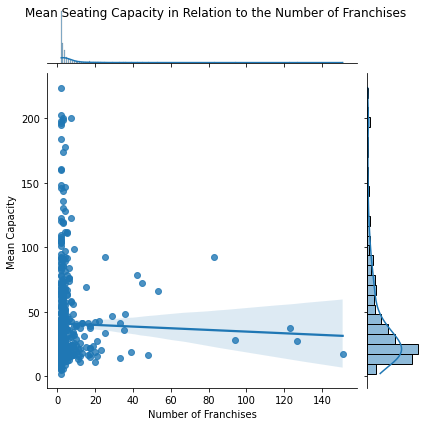

In [25]:
sns.jointplot(x="Number of Franchises", y="Mean Capacity", data=
              chains_number_capacity[chains_number_capacity['Number of Franchises']>1], kind='reg');
plt.suptitle('Mean Seating Capacity in Relation to the Number of Franchises');

We see that the more franchises a chain has, it tends to have a lower number of seats.

In [61]:
print ('The mean capacity of an establishment is {:.2f}.'.format(chains_number_capacity['Mean Capacity'].mean()))


The mean capacity of an establishment is 42.30.


###    Determine the average number of seats for each type of establishment

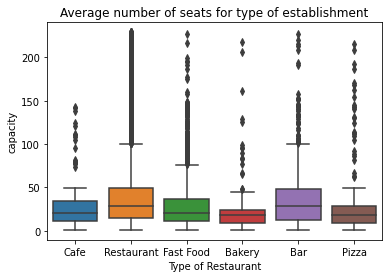

In [26]:
ax = sns.boxplot(x='rest_type', y='capacity', data=rest_data) 
ax.set_title('Average number of seats for type of establishment');
ax.set_xlabel('Type of Restaurant');


We see that on average, restaurants and bars have a similar number of seats.

###    Put the data on street names from the address column in a separate column.   Plot a graph of the top ten streets by number of restaurants.

In [27]:
rest_data.head(5)

,id,rest_name,address,chain,rest_type,capacity,chain_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,HABITAT
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,REILLYS
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,STREET
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,TRINITI
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,POLLEN


In order to arrive at the street name, we remove the extra information in the address. This can include street number, direction (East, North, West, South), suite or appartment number. By removing all these we are left in the `street_name` field with only the name of the street.

In [28]:
rest_data['street_name']=rest_data['address'].str.replace("^[\d]* ([E|N|W|S] )?",'')
rest_data['street_name']=rest_data['street_name'].str.replace("[1,3]/[2,4] ([E|N|W|S] )?",'')
rest_data['street_name']=rest_data['street_name'].str.replace("#.*$",'')
rest_data['street_name']=rest_data['street_name'].str.replace(" STE.*$",'')
rest_data['street_name']=rest_data['street_name'].str.replace(" FL.*$",'')
rest_data['street_name']=rest_data['street_name'].str.replace(" UNIT.*$",'')
rest_data['street_name']=rest_data['street_name'].str.replace(" BLV.*$",' BLVD')
rest_data['street_name']=rest_data['street_name'].str.replace(" WAY.*$",' WAY')
rest_data['street_name']=rest_data['street_name'].str.replace(" AVE.*$",' AVE')
rest_data['street_name']=rest_data['street_name'].str.replace(" ST.*$",' ST')
rest_data['street_name']=rest_data['street_name'].str.replace(" ([E|N|W|S] )?\D\d?-?[0-9]* *$",'');

In [29]:
print(rest_data['street_name'].value_counts().to_string())

SUNSET BLVD                     403
WILSHIRE BLVD                   397
PICO BLVD                       370
WESTERN AVE                     367
FIGUEROA ST                     332
OLYMPIC BLVD                    309
VERMONT AVE                     286
SANTA MONICA BLVD               264
3RD ST                          261
HOLLYWOOD BLVD                  253
6TH ST                          234
BEVERLY BLVD                    194
MELROSE AVE                     154
WORLD WAY                       145
BROADWAY                        144
WHITTIER BLVD                   132
VENICE BLVD                     123
1ST ST                          122
8TH ST                          119
7TH ST                          118
CENTRAL AVE                     107
WESTWOOD BLVD                   100
LA BREA AVE                     100
SPRING ST                        97
WASHINGTON BLVD                  94
GRAND AVE                        91
COLORADO BLVD                    88
FLORENCE AVE                

In [30]:
street_rest=rest_data['street_name'].value_counts().reset_index()
street_rest.columns=['Street Name','Number of Restaurants']
top_10_streets=street_rest.head(10)

In [31]:
top_10_streets

,Street Name,Number of Restaurants
0,SUNSET BLVD,403
1,WILSHIRE BLVD,397
2,PICO BLVD,370
3,WESTERN AVE,367
4,FIGUEROA ST,332
5,OLYMPIC BLVD,309
6,VERMONT AVE,286
7,SANTA MONICA BLVD,264
8,3RD ST,261
9,HOLLYWOOD BLVD,253


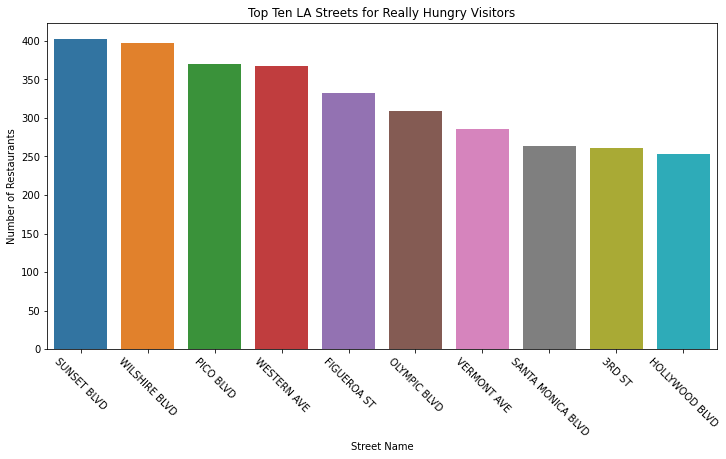

In [32]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=top_10_streets, x='Street Name',y='Number of Restaurants')\
    .set(title='Top Ten LA Streets for Really Hungry Visitors');
ax.set_xticklabels(ax.get_xticklabels(),rotation=-45)
plt.show()

Wow, 403 restaurants on Sunset Boulevard! This is madness!

###    Find the number of streets that only have one restaurant.

In [33]:
nr_single_rest_streets=len(street_rest[street_rest['Number of Restaurants']==1])
perc_single_rest_streets=nr_single_rest_streets/len(street_rest)
perc_single_rest_rests=nr_single_rest_streets/len(rest_data)
print("The number of streets with only one restaurant is {}. This represents {:.2%} of the number of restaurants and {:.2%} from the total number of streets.".
      format(nr_single_rest_streets,perc_single_rest_rests,perc_single_rest_streets))

The number of streets with only one restaurant is 264. This represents 2.74% of the number of restaurants and 46.64% from the total number of streets.


So we have onnly $264$ streets with only one restaurant which represents only $2.74\%$ of all the restaurants. That's a really small number. More than $97 \%$ of restaurants prefere to be near other restaurants.
<b>There are two possible causes for this phenomenon</b>. Either there is a business related reason why restaurants (and similar shops in general) tend to be one next to the other, or there is a lot of competition on streets with big touristic potential.

###    For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

Let's take a subset of the database with only the restaurants on the 10 busiest streets.

In [34]:
busy_streets=rest_data[rest_data["street_name"].isin(top_10_streets['Street Name'])]

Let's plot a violin chart with the dristribution of the number of seets on the restaurants on these streets.

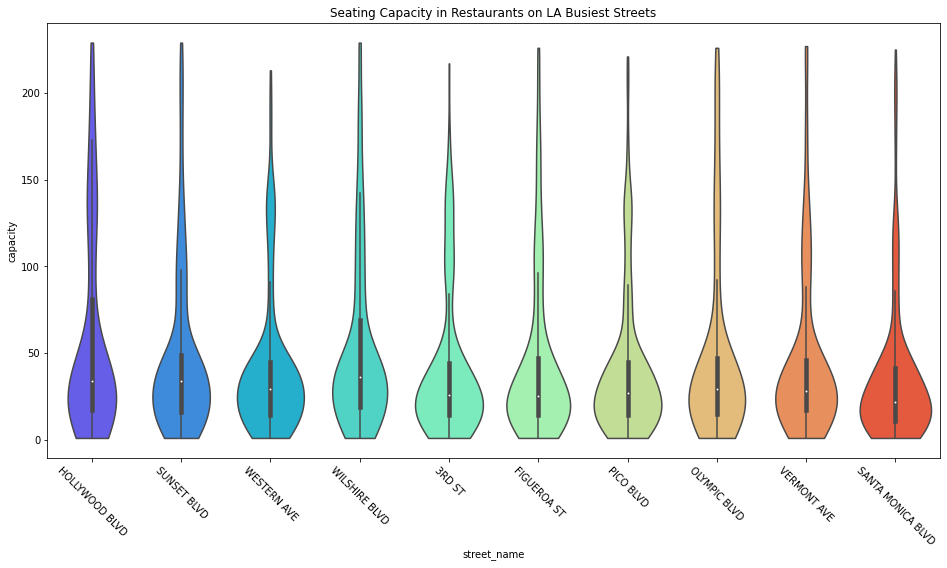

In [35]:
fig,ax=plt.subplots(figsize=(16,8))
sns.violinplot(x="street_name", y="capacity", cut=0, data=busy_streets, palette='rainbow')\
    .set(title='Seating Capacity in Restaurants on LA Busiest Streets');
ax.set_xticklabels(ax.get_xticklabels(),rotation=-45)
plt.show() 


In [36]:
street_rest

,Street Name,Number of Restaurants
0,SUNSET BLVD,403
1,WILSHIRE BLVD,397
2,PICO BLVD,370
3,WESTERN AVE,367
4,FIGUEROA ST,332
...,...,...
561,PALMETTO ST,1
562,THE GROVE DR BLDG,1
563,17TH ST,1
564,MANSFIELD AVE,1


In [37]:
#For the best analysis, we need to add to each entry the number of restaurants on that streets.
#Until now I tried to avoid this as it adds a lot of redundand information, but for the next step it is imperative.
rest_data_street=rest_data.merge(street_rest.rename(columns={'Street Name':'street_name'}),on='street_name')
rest_data_street.head()

,id,rest_name,address,chain,rest_type,capacity,chain_name,street_name,Number of Restaurants
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,HABITAT,EAGLE ROCK BLVD,39
1,12417,ARMON'S RESTAURANT,5056 EAGLE ROCK BLVD,True,Restaurant,32,ARMONS,EAGLE ROCK BLVD,39
2,12426,LA ESQUINA RESTAURANT #2,4159 EAGLE ROCK BLVD,True,Restaurant,46,LA,EAGLE ROCK BLVD,39
3,12431,TARGET STORE T-3262,4211 EAGLE ROCK BLVD,False,Cafe,27,TARGET,EAGLE ROCK BLVD,39
4,12432,ABBY'S DINER,4862 EAGLE ROCK BLVD,False,Restaurant,7,ABBYS,EAGLE ROCK BLVD,39


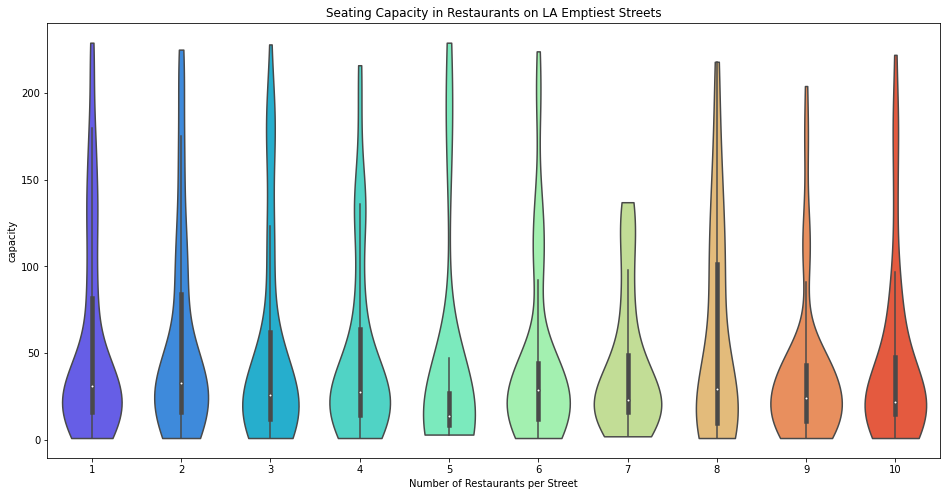

In [38]:
fig,ax=plt.subplots(figsize=(16,8))
sns.violinplot(x="Number of Restaurants", y="capacity", cut=0, data=rest_data_street[rest_data_street['Number of Restaurants']<11], palette='rainbow')
    
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel('Number of Restaurants per Street')
ax.set_title('Seating Capacity in Restaurants on LA Emptiest Streets');
plt.show() 


In [39]:
busy_streets.head()

,id,rest_name,address,chain,rest_type,capacity,chain_name,street_name
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,STREET,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,TRINITI,SUNSET BLVD
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,POLLO,SUNSET BLVD
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17,POONG,WESTERN AVE
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,CUSCATLECA,SUNSET BLVD


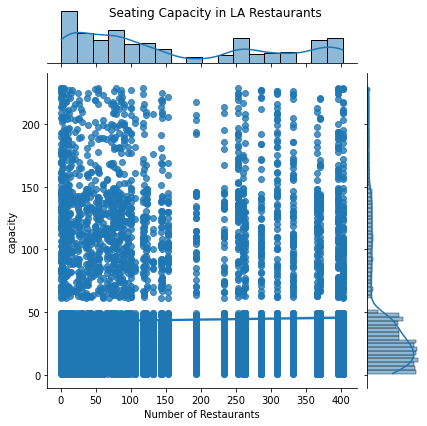

In [40]:
sns.jointplot(x="Number of Restaurants", y="capacity", data=rest_data_street, kind='reg');
plt.suptitle('Seating Capacity in LA Restaurants');


We realize that restaurant chains usually go for a relatively small capacity. I wonder what's the average capacity of independent restaurants?

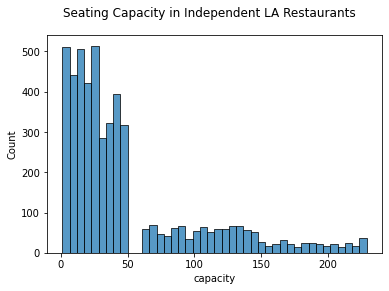

In [82]:
sns.histplot(x="capacity", data=rest_data_street[(rest_data_street['chain']==False)&(rest_data_street['rest_type']=='Restaurant')]);
plt.suptitle('Seating Capacity in Independent LA Restaurants');

In [84]:
print ('The mean capacity of an independent restaurant is {:.2f}.'.format(rest_data_street[(rest_data_street['chain']==False)&(rest_data_street['rest_type']=='Restaurant')]['capacity'].mean()))

The mean capacity of an independent restaurant is 49.51.


We see that independent restaurants have a similar seating capacity distribution with chains, just a little higher.

### Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

We have analyzed the data for LA establishments.<br>
In general there are <i>two pathways</i> to success. One is to open a business in a place that has no other competitors that fulfill the customer need we aim to fulfill. But this path is very risky, as the vast majority of such places have been scouted already and if there are no competitors there, it's because they realized it won't be profitable.<br>
The second path is to open a business in a place that's already proven to attract customers, and exhibit some defining feature that diferentiates that business from the competition.<br>
It's clear to me that the latter is our best chance. Our robot run restaurant will be a sensation among the more traditional restaurants that fill the LA culinary landscape.<br>
Looking through the data we see a clear preference for a certain type of establishment. We can assume that this preference comes from experience with what the customers need and desire.
Based on these conclusions, looking in the data we see that our best option is to open a restaurant ($75.2%$ of the total establishment types), with around 40 seats in one of the top 5 busiests streets in LA. As the first restaurant gains success, we can open more francises and develop a whole chain of Robot Run Restaurants!

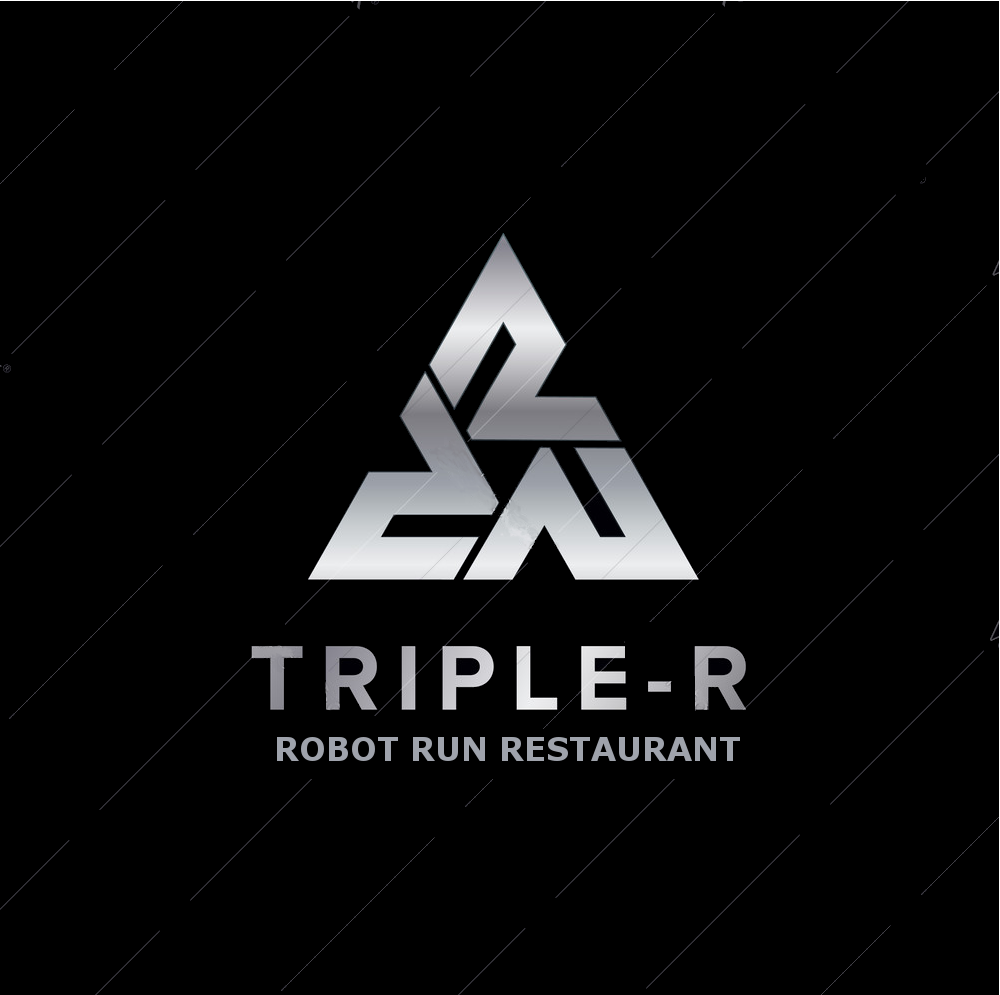


### Presentation

Link to PDF presentation:

https://1drv.ms/b/s!AjGR-v_BEehGgxPP1-sYHLxVqRzx?e=Xc9Vw0